In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [2]:
df=pd.read_csv("diabetes.csv")


In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
#check duplicate values
df[df.duplicated()==True]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [8]:
# Statistical analysis
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
#Correlation
df.corr()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot:>

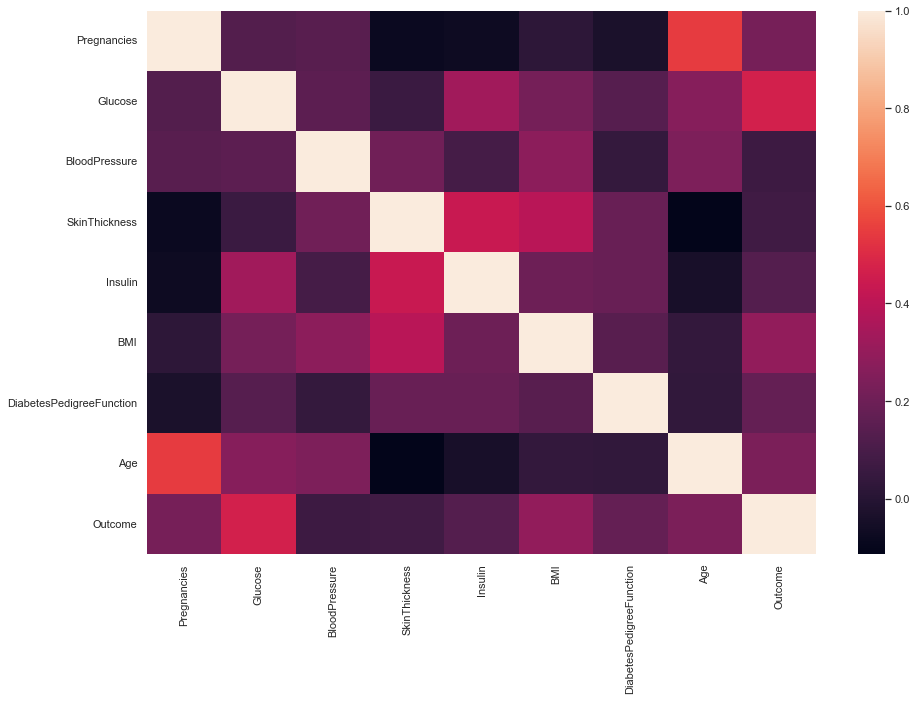

In [10]:
sns.set(rc={"figure.figsize":(15,10)})
sns.heatmap(data=df.corr())

<AxesSubplot:>

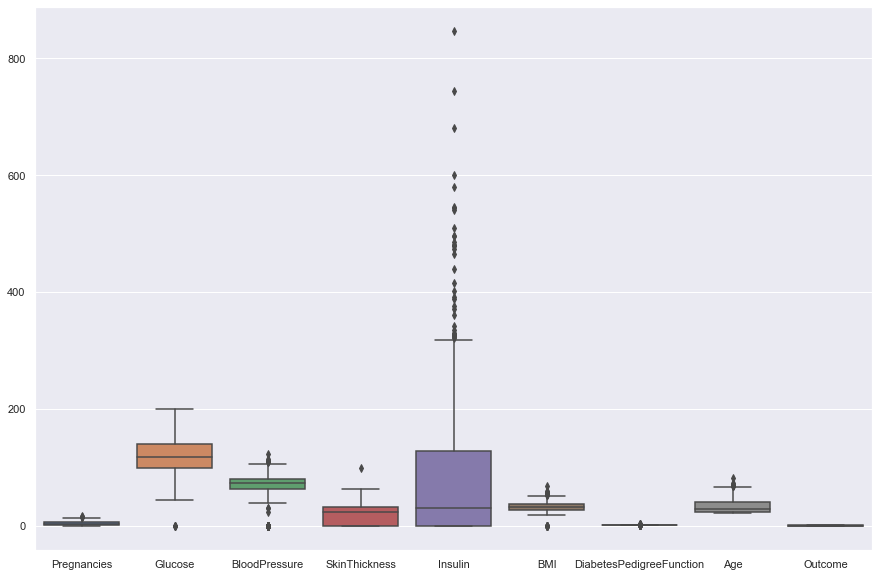

In [11]:
# Outliers
sns.boxplot(data=df)

In [12]:
X=df.drop('Outcome',axis=1)
y=df['Outcome']


In [13]:
X.shape,y.shape


((768, 8), (768,))

In [14]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [15]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 8)
(154, 8)
(614,)
(154,)


In [16]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)


In [17]:
X_train


array([[ 0.90832902,  0.91569367,  0.44912368, ...,  0.37852648,
         0.67740401,  1.69955804],
       [ 0.03644676, -0.75182191, -0.47230103, ..., -0.50667229,
        -0.07049698, -0.96569189],
       [-1.12606292,  1.38763205,  1.06340683, ...,  2.54094063,
        -0.11855487, -0.88240283],
       ...,
       [ 0.03644676, -0.84620959, -0.21634972, ..., -0.94927168,
        -0.95656442, -1.04898095],
       [ 2.0708387 , -1.12937261,  0.24436264, ..., -0.26640405,
        -0.50001442,  0.11706589],
       [ 0.32707418,  0.47521786,  0.65388473, ..., -4.07275877,
         0.52121586,  2.94889395]])

In [18]:
X_test

array([[-0.8354355 ,  2.45735903,  0.34674316, ...,  1.35224513,
         2.78594417, -0.96569189],
       [-0.54480808, -0.43719633,  0.24436264, ...,  0.17619533,
        -0.1876381 , -0.88240283],
       [ 0.03644676, -1.41253563, -0.36992051, ...,  0.22677812,
        -0.22668514, -0.71582471],
       ...,
       [ 0.03644676,  0.66399321,  0.85864578, ...,  1.4913478 ,
         0.53623395, -0.96569189],
       [-0.25418066, -0.15403331,  0.24436264, ..., -0.74694053,
        -1.07971278, -0.79911377],
       [-0.8354355 , -0.43719633,  0.14198211, ..., -0.17788417,
         1.06487079, -0.79911377]])

In [19]:
# Importing the Keras libraries and packages
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout


In [76]:
classifier=Sequential()
classifier.add(Dense(units=10,kernel_initializer='he_uniform',activation='relu',input_dim =8))
classifier.add(Dense(units = 10, kernel_initializer = 'he_uniform',activation='relu'))
classifier.add(Dense(units = 20, kernel_initializer = 'he_uniform',activation='relu'))
classifier.add(Dense(units = 20, kernel_initializer = 'he_uniform',activation='relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

In [77]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy',metrics=['accuracy'])


In [78]:
classifier.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                90        
                                                                 
 dense_9 (Dense)             (None, 10)                110       
                                                                 
 dense_10 (Dense)            (None, 20)                220       
                                                                 
 dense_11 (Dense)            (None, 20)                420       
                                                                 
 dense_12 (Dense)            (None, 1)                 21        
                                                                 
Total params: 861
Trainable params: 861
Non-trainable params: 0
_________________________________________________________________


In [87]:
model_history=classifier.fit(X_train,y_train,batch_size=16,epochs=45,validation_split=0.30)


Epoch 1/45
27/27 [==============================] - 0s 10ms/step - loss: 0.2911 - accuracy: 0.8811 - val_loss: 0.7186 - val_accuracy: 0.7405
Epoch 2/45
27/27 [==============================] - 0s 6ms/step - loss: 0.2886 - accuracy: 0.8928 - val_loss: 0.7151 - val_accuracy: 0.7514
Epoch 3/45
27/27 [==============================] - 0s 6ms/step - loss: 0.2886 - accuracy: 0.8858 - val_loss: 0.7314 - val_accuracy: 0.7459
Epoch 4/45
27/27 [==============================] - 0s 6ms/step - loss: 0.2908 - accuracy: 0.8834 - val_loss: 0.7194 - val_accuracy: 0.7351
Epoch 5/45
27/27 [==============================] - 0s 6ms/step - loss: 0.2852 - accuracy: 0.8904 - val_loss: 0.7349 - val_accuracy: 0.7459
Epoch 6/45
27/27 [==============================] - 0s 6ms/step - loss: 0.2859 - accuracy: 0.8951 - val_loss: 0.7389 - val_accuracy: 0.7459
Epoch 7/45
27/27 [==============================] - 0s 6ms/step - loss: 0.2832 - accuracy: 0.8834 - val_loss: 0.7295 - val_accuracy: 0.7459
Epoch 8/45
27/27 [=

In [82]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [83]:
model_history.history['accuracy']

[0.8414918184280396,
 0.8368298411369324,
 0.8508158326148987,
 0.8531468510627747,
 0.8461538553237915,
 0.8508158326148987,
 0.8508158326148987,
 0.8531468510627747,
 0.8531468510627747,
 0.8484848737716675,
 0.8578088283538818,
 0.8601398468017578,
 0.8601398468017578,
 0.8717948794364929,
 0.8648018836975098,
 0.8717948794364929,
 0.8601398468017578,
 0.8601398468017578,
 0.867132842540741,
 0.8648018836975098,
 0.8787878751754761,
 0.8717948794364929,
 0.8741258978843689,
 0.8717948794364929,
 0.8694638609886169,
 0.8717948794364929,
 0.8764568567276001,
 0.8717948794364929,
 0.8857808709144592,
 0.8764568567276001,
 0.8717948794364929,
 0.867132842540741,
 0.8857808709144592,
 0.883449912071228,
 0.881118893623352,
 0.881118893623352,
 0.8741258978843689,
 0.8787878751754761,
 0.883449912071228,
 0.883449912071228]

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


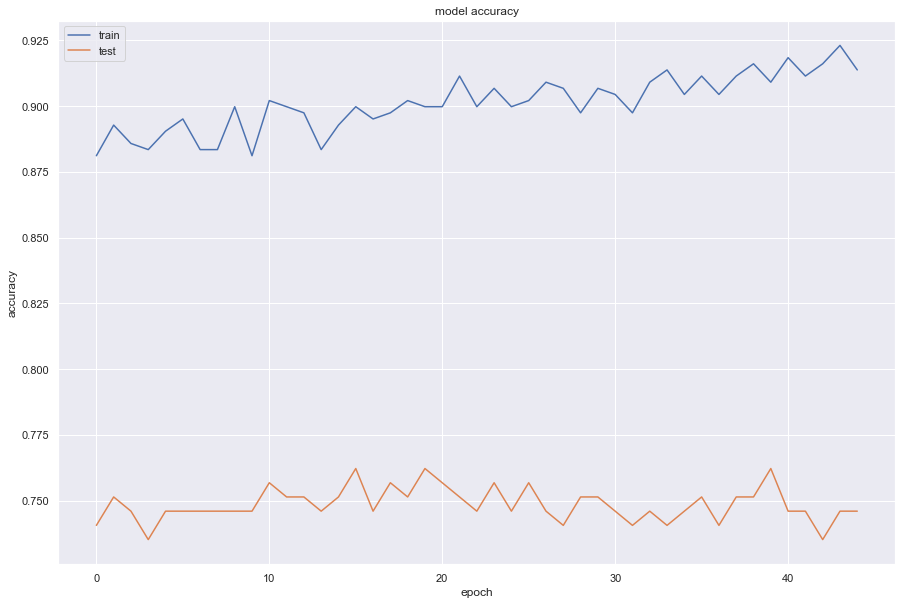

In [88]:
# list all data in history
print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

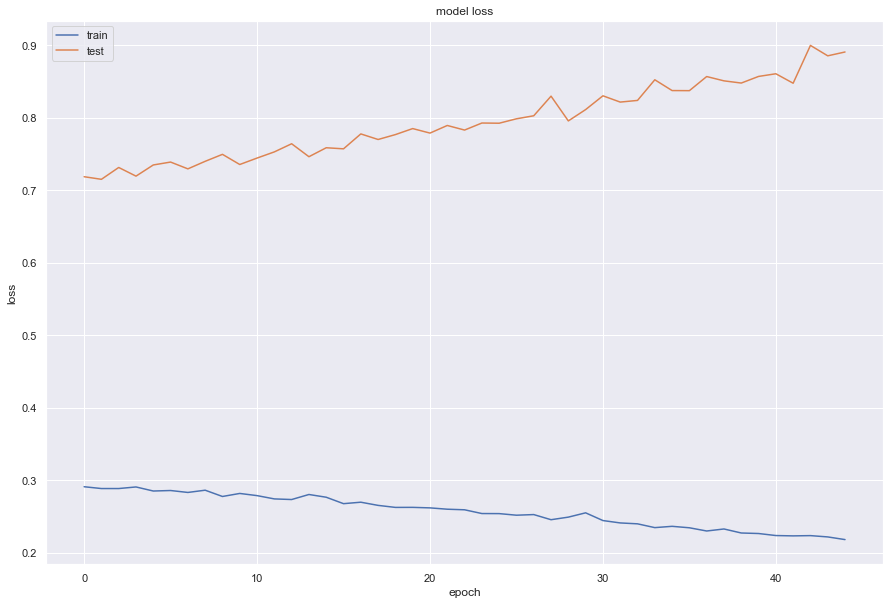

In [89]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [92]:
y_pred=classifier.predict(X_test)


5/5 [==============================] - 0s 2ms/step


In [90]:
y_pred=y_pred>0.5


In [91]:
from sklearn.metrics import confusion_matrix


In [93]:
conf_mat=confusion_matrix(y_test,y_pred)
conf_mat


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [56]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]


In [57]:
# Breaking down the formula for Accuracy
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy


0.7662337662337663

In [58]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.8317757009345794

In [59]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall


0.8317757009345794

### hyperparameter tuning


In [60]:
from kerastuner.tuners import RandomSearch

In [61]:
def build_model(hp):
    model=Sequential()
    model.add(Dense(units=10,kernel_initializer = 'he_uniform',activation='relu',input_dim=8))
    model.add(Dense(units = 10, kernel_initializer = 'he_uniform',activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    optimizer=hp.Choice("optimizer",values=["adam","sgd","rmsprop","adadelta"])
    model.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    return model


In [62]:
tuner=RandomSearch(build_model,objective='val_accuracy',max_trials=5,directory='project1',project_name='diabetes')

INFO:tensorflow:Reloading Tuner from project1\diabetes\tuner0.json


In [63]:
tuner.search(X_train,y_train,validation_data=(X_test,y_test),epochs=5)


INFO:tensorflow:Oracle triggered exit


In [64]:
tuner.get_best_hyperparameters()[0].values


{'optimizer': 'adam'}

In [65]:
best_model = tuner.get_best_models()[0]

In [66]:
best_model


In [67]:
best_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                90        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 211
Trainable params: 211
Non-trainable params: 0
_________________________________________________________________
